# Exploratory Data Analysis on Amazon Fine Food Reviews

## Data Description

- This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

## Data includes:

- Reviews from Oct 1999 - Oct 2012 - 568,454 reviews
- 256,059 Users and 74,258 products
- 260 users with > 50 reviews

## The columns in tables are :

- Id - Unique row number
- ProductId - Unique identifier for the product
- UserId - Unique identifier for the user
- ProfileName
- HelpfulnessNumerator - Number of users who found the review helpful
- HelpfulnessDenominator - Number of users who indicated whether they found the review helpful
- Score - Rating between 1 and 5
- Time - Timestamp for the review
- ReviewSummary - Brief summary of the review
- ReviewText - Text of the review

#### NOTE - Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# drop unnamed column
df.drop('Id',axis = 1,inplace = True)

In [4]:
#checking null values
df.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
#Droping rows with null values
df = df.dropna()

In [6]:
#checking null values
df.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568411 non-null  object
 1   UserId                  568411 non-null  object
 2   ProfileName             568411 non-null  object
 3   HelpfulnessNumerator    568411 non-null  int64 
 4   HelpfulnessDenominator  568411 non-null  int64 
 5   Score                   568411 non-null  int64 
 6   Time                    568411 non-null  int64 
 7   Summary                 568411 non-null  object
 8   Text                    568411 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


# Distribution of Ratings

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

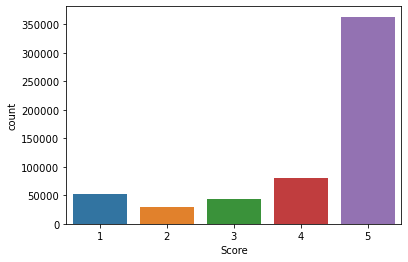

In [8]:
# plotting rating distribution
sns.countplot(df.Score)

> 5 star review constitute a large proportion(64%) of all reviews. The next most review is 4 star(14%) followed by 1 star(9%),3 star(7%) and finally 2 star(5%)

## Lets consider

- Positive review (4-5 Rating)
- Negative review (1-2 Rating)

In [9]:
# removing 3 and 0 score from dataframe
df1 = df[df.Score != 3]

In [10]:
df1.Score.value_counts()

5    363111
4     80655
1     52264
2     29743
Name: Score, dtype: int64

In [11]:
# mapping the positive and negative to Score based on condition
df1['Rating'] = df1.Score.apply(lambda x : 'Positive' if x == 5 or x == 4 else 'Negative')

/var/folders/py/kj7vl_cn3h15myw7nrj3nhcw0000gn/T/ipykernel_56637/323676622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rating'] = df1.Score.apply(lambda x : 'Positive' if x == 5 or x == 4 else 'Negative')


In [12]:
df1.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [13]:
# checking the value_counts of Rating
df1.Rating.value_counts()

Positive    443766
Negative     82007
Name: Rating, dtype: int64

# Popular words in Positive Reviews (4-5 Rating)

In [14]:
positive = df1[df1.Rating == 'Positive']['Text']

In [15]:
positive

0         I have bought several of the Vitality canned d...
2         This is a confection that has been around a fe...
4         Great taffy at a great price.  There was a wid...
5         I got a wild hair for taffy and ordered this f...
6         This saltwater taffy had great flavors and was...
                                ...                        
568448    My only complaint is that there's so much of i...
568449    Great for sesame chicken..this is a good if no...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 443766, dtype: object

In [16]:
!pip install wordcloud

In [17]:
# importing wordcloud library
from wordcloud import WordCloud, STOPWORDS

In [18]:
# importing stopwords
from nltk.corpus import stopwords

In [19]:
# joing the positive text
text_postive = ' '.join(positive)

In [20]:
# removing 'br' from text
cleaned_positve = ' '.join([word for word in text_postive.split()
                       if 'br' not in word])

In [21]:
# creating positive wordcloud
positive_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='White',
                          width=1600,
                          height=800).generate(cleaned_positve)

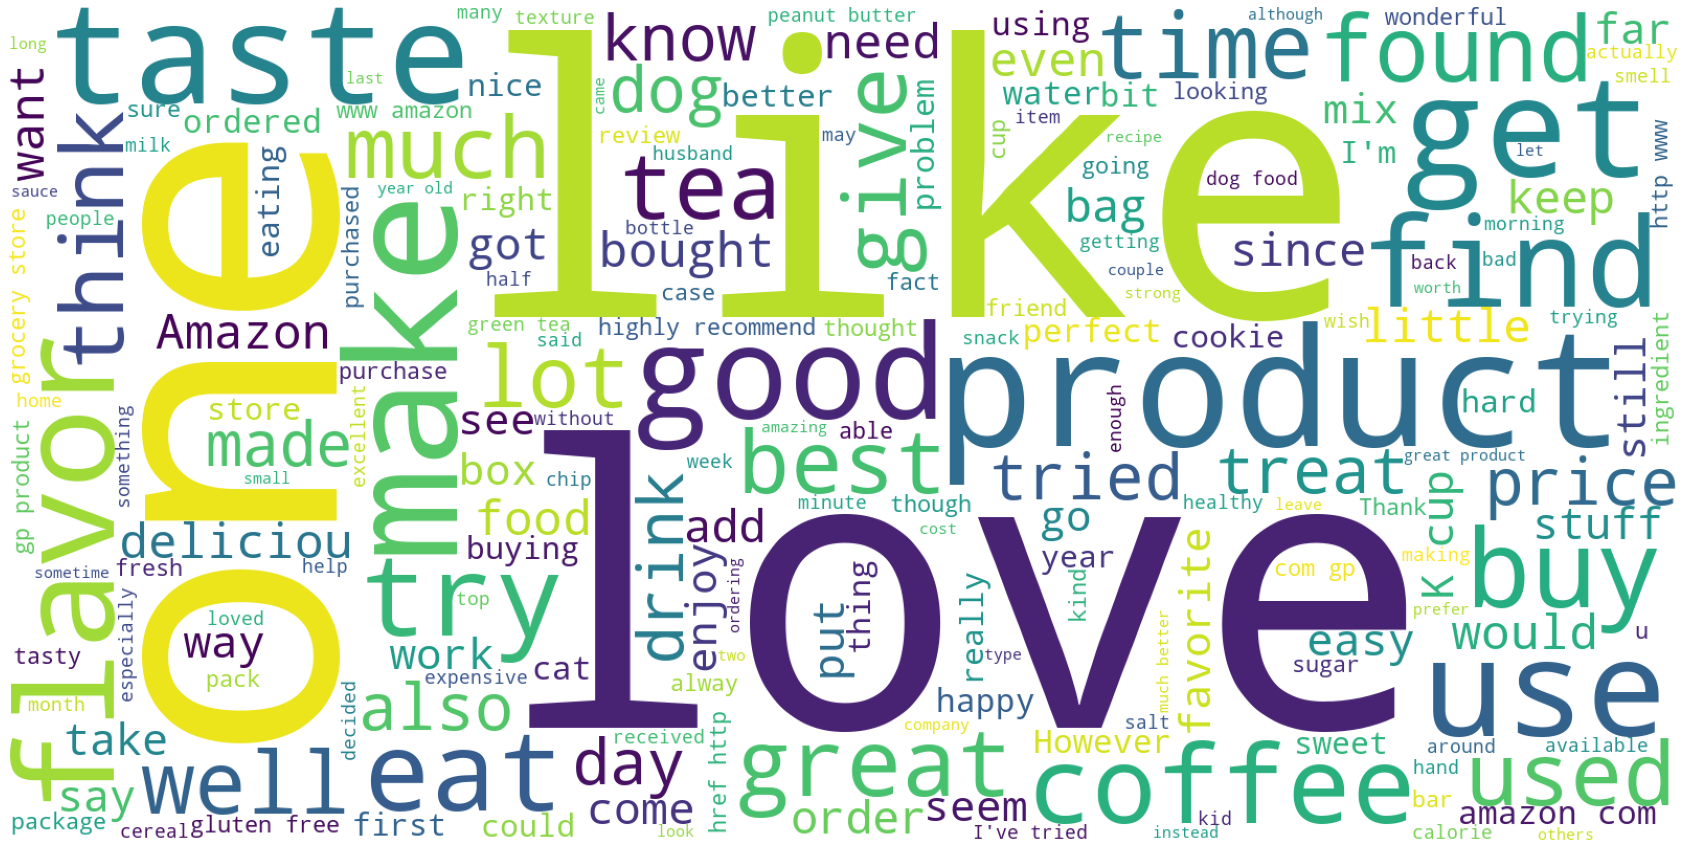

In [22]:
# plotting wordcount of positive text
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

# Popular words in Negative Reviews (1-2 Rating)

In [24]:
# creating negative dataframe
Negative = df1[df1.Rating == 'Negative']['Text']

In [25]:
# joining and cleaning negative text
text_negative = ' '.join(Negative)
cleaned_negative = ' '.join([word for word in text_negative.split()
                       if 'br' not in word])

In [26]:
# creating negative wordcloud
negative_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='White',
                          width=1600,
                          height=800).generate(cleaned_negative)

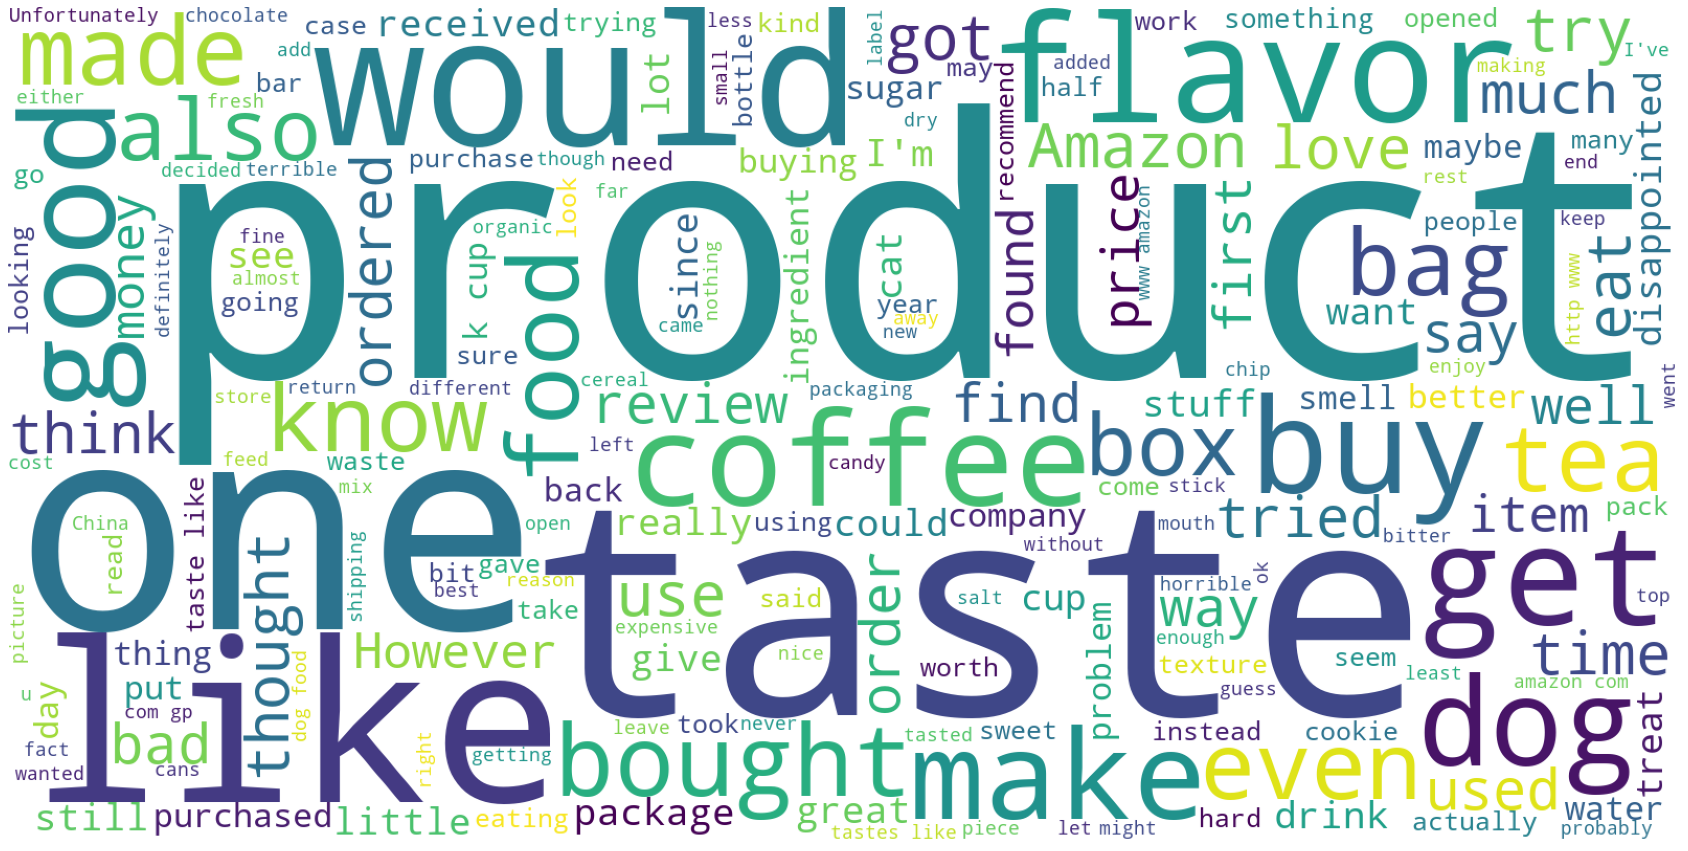

In [27]:
# plotting wordcloud
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

In [29]:
# creating Helpful
Helpful = df1.HelpfulnessNumerator/df1.HelpfulnessDenominator

In [30]:
Helpful = Helpful*100

In [31]:
Helpful

0         100.0
1           NaN
2         100.0
3         100.0
4           NaN
          ...  
568449      NaN
568450      NaN
568451    100.0
568452    100.0
568453      NaN
Length: 525773, dtype: float64

## Divide this Helpful into four categories

- No Indication(not voted at all)
- Helpful reviews had more than 75% of voters find the review helpful
- Unhelpful reviews had less than 25% of voters find the review helpful
- Intermediate group of 25-75% helpfulness

In [32]:
# creating dataframe of helpful
Helpful = pd.DataFrame(Helpful)

In [33]:
# creating column in df helpful
Helpful.columns = ['Helpfullness']

In [34]:
# creating helpful_cat function to differentiate helpfulness
def helpful_cat(x):
    if x > 75:
        return 'Helpful'
    elif x < 25:
        return 'Unhelpful'
    elif x >= 25 and x <= 75:
        return 'Intermediate'
    else:
        return 'No indication'

In [35]:
# applying the function to helpful dataframe
Helpful['category'] = Helpful['Helpfullness'].apply(helpful_cat)

In [36]:
Helpful.head()

,Helpfullness,category
0,100.0,Helpful
1,NaN,No indication
2,100.0,Helpful
3,100.0,Helpful
4,NaN,No indication


In [37]:
# checking helpful category valuecount
Helpful.category.value_counts(normalize=True)

No indication    0.478566
Helpful          0.363841
Intermediate     0.095412
Unhelpful        0.062181
Name: category, dtype: float64

# Distribution of Helpfulness

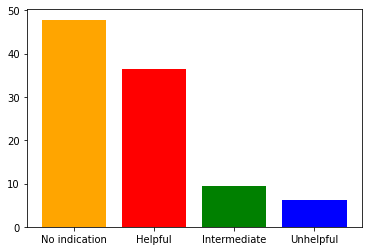

In [38]:
# plotting distribution 0f helpfulness
height = Helpful.category.value_counts(normalize=True).values*100
bars = Helpful.category.value_counts(normalize=True).index
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['Orange', 'red', 'green', 'blue', 'cyan'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

## Lets consider Helpful and Unhelpful

In [39]:
# copy df1 into df2
df2 = df1.copy()

In [40]:
# concat helpful and df2
df2 = pd.concat([df2,Helpful],axis = 1)

In [41]:
df2.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating,Helpfullness,category
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,100.0,Helpful
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,NaN,No indication
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,100.0,Helpful
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,100.0,Helpful
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,NaN,No indication


In [42]:
# removing no indication from df2
df2 = df2[df2.category != 'No indication']

In [44]:
# checking shape of df2
df2.shape

(274156, 12)

## How does rating affect Helpfulness?

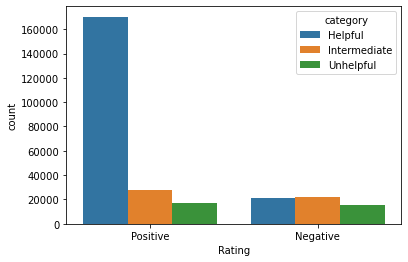

In [46]:
sns.countplot(x='Rating', hue='category', order=["Positive", "Negative"], 
              hue_order=['Helpful', 'Intermediate', 'Unhelpful'], data=df2)
plt.xlabel('Rating')
plt.show()

> **As the rating becomes more positive, the reviews become more helpful (and less unhelpful).**

In [47]:
# creating dataframe df3 from df by removing 0 score
df3 = df[df.Score != 0]

In [48]:
df3.Score.unique()

array([5, 1, 4, 2, 3])

In [49]:
df3.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Word Count

In [50]:
# importing regular expression library
import re

In [51]:
# creating wordcount function
def word_count(x):
    res = len(re.findall(r'\w+',x))
    return res

In [54]:
# applying the wordcount function reviewtext column
df3['Wordcount'] = df3.Text.apply(word_count)

In [55]:
df3.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Wordcount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,48
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,32
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,93
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,41
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27


## How does word count vary by rating?

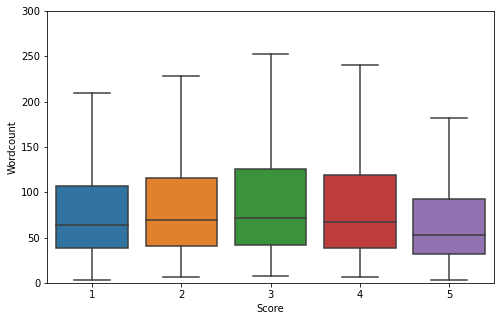

In [57]:
# plotting word count v/s score 
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Score',y = 'Wordcount',data = df3, showfliers=False)
plt.ylim(0,300)
plt.show()

> **5-star reviews had the lowest median word count (53 words), while 3-star reviews had the largest median word count (71 words).**

In [58]:
df2.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating,Helpfullness,category
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,100.0,Helpful
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,100.0,Helpful
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,100.0,Helpful
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive,100.0,Helpful
10,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,Positive,100.0,Helpful


In [61]:
# applying word count function to datframe df2 review text
df2['Wordcount'] = df2.Text.apply(word_count)

## How does word count relate to helpfulness?

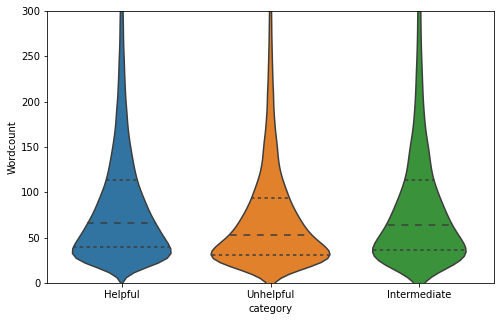

In [63]:
# plotting wordcount v/s helpfulness
plt.figure(figsize=(8,5))
sns.violinplot(x = 'category',y = 'Wordcount',data = df2,gridsize=500,inner='quartile')
plt.ylim(0,300)
plt.show()

> **Helpful reviews have a higher median word count (67 words) than not helpful reviews (54 words) and intermediate have almost same as helpful.**

## Frequency of Reviewers

In [66]:
# creating dictionary of userid valuecounts
x = df3.UserId.value_counts()
x.to_dict()
print(x)

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
AQ8W157G7F6I2       1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256047, dtype: int64


In [67]:
# applying the frequency to userid
df3['reviewerfrequency'] = df3.UserId.apply(lambda index :  "Frequent" if x[index] > 50 else "Not Frequent")

In [68]:
df3.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Wordcount,reviewerfrequency
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,48,Not Frequent
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,32,Not Frequent
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,93,Not Frequent
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,41,Not Frequent
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27,Not Frequent


## Are frequent reviewers more discerning?

<AxesSubplot:xlabel='Score', ylabel='count'>

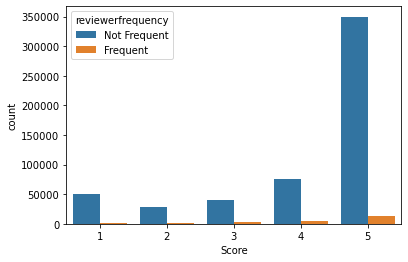

In [70]:
# plotting countplot of score with hue reviewer frequency
sns.countplot(x = 'Score',data = df3,hue = 'reviewerfrequency')

> **The frequent reviewers give less 5-star reviews and less 1-star review. Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews**

In [71]:
df2.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating,Helpfullness,category,Wordcount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,100.0,Helpful,48
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,100.0,Helpful,93
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,100.0,Helpful,41
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive,100.0,Helpful,27
10,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,Positive,100.0,Helpful,154


In [73]:
x = df2.UserId.value_counts()
x.to_dict()
print(x)

A1YUL9PCJR3JTY    342
A281NPSIMI1C2R    227
A3OXHLG6DIBRW8    216
A3TVZM3ZIXG8YW    199
AY12DBB0U420B     151
                 ... 
AFH0NVLPB9942       1
AKHJO0EJYKVAD       1
A1ZI3B7NBPTLCS      1
A2DMNKPJ66FGSF      1
A3IBEVCTXKNOH       1
Name: UserId, Length: 141174, dtype: int64


In [74]:
df2['reviewerfrequency'] = df2.UserId.apply(lambda index :  "Frequent" if x[index] > 50 else "Not Frequent")

## Are frequent reviewers more helpful?

<AxesSubplot:xlabel='category', ylabel='count'>

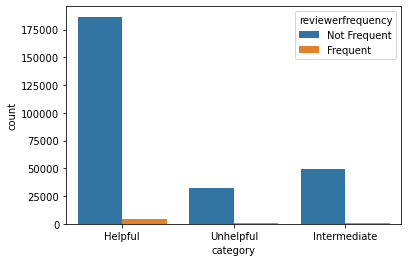

In [76]:
# creating count plot of helpfulness with hue of reviewerfrequency
sns.countplot(x = 'category',data = df2,hue = 'reviewerfrequency')

> **Frequent reviewers are more likely to have their review voted on and when voted on more likely to be voted helpful, and less likely to be unhelpful**

## Are frequent reviewers more verbose?

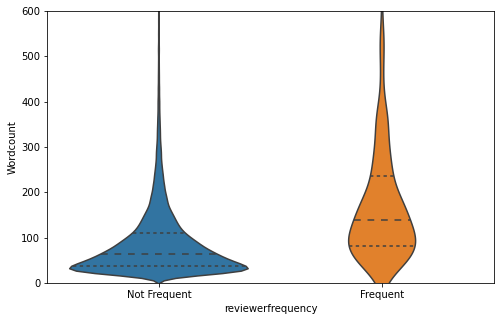

In [77]:
# create violinplot of reviewerfrequency v/s word count
plt.figure(figsize=(8,5))
sns.violinplot(x = 'reviewerfrequency',y = 'Wordcount',data = df2,gridsize=500,inner='quartile')
plt.ylim(0,600)
plt.show()

> **The distributions of word counts for frequent and infrequent reviews shows that infrequent reviewers have a large amount of reviews of low word count. On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. Moreover, the median word count for frequent reviewers is higher than the median for infrequent reviewers**

# Conclusion

- Positive reviews are very common.
- Positive reviews are shorter.
- Longer reviews are more helpful.
- Despite being more common and shorter, positive reviews are found more helpful.
- Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews